

**Remoção de colunas irrelevantes**



In [2]:
import pandas as pd

df = pd.read_csv('dados_telecom_tratados.csv')

print("Colunas originais:", df.columns)

df.drop('ID_Cliente', axis=1, inplace=True)

df.to_csv('dados_telecom_limpos.csv', index=False)

print("\nVisualização do DataFrame após remover a coluna 'ID_Cliente':")
print(df.head())

Colunas originais: Index(['ID_Cliente', 'Churn', 'Genero', 'Idoso', 'Possui_Parceiro',
       'Possui_Dependentes', 'Tempo_de_Contrato_Meses', 'Servico_Telefonico',
       'Multiplas_Linhas', 'Servico_de_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_de_Dispositivo', 'Suporte_Tecnico',
       'Streaming_de_TV', 'Streaming_de_Filmes', 'Tipo_de_Contrato',
       'Fatura_Digital', 'Metodo_de_Pagamento', 'Taxa_Mensal', 'Taxa_Total',
       'Taxa_Diaria'],
      dtype='object')

Visualização do DataFrame após remover a coluna 'ID_Cliente':
   Churn  Genero  Idoso  Possui_Parceiro  Possui_Dependentes  \
0      0  Female      0                1                   1   
1      0    Male      0                0                   0   
2      1    Male      0                0                   0   
3      1    Male      1                1                   0   
4      1  Female      1                1                   0   

   Tempo_de_Contrato_Meses  Servico_Telefonico  Multipla

**Encoding**

In [3]:
import pandas as pd

df = pd.read_csv('dados_telecom_limpos.csv')

colunas_categoricas = df.select_dtypes(include=['object']).columns

print("Colunas categóricas a serem transformadas:", list(colunas_categoricas))

df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)


Colunas categóricas a serem transformadas: ['Genero', 'Servico_de_Internet', 'Tipo_de_Contrato', 'Metodo_de_Pagamento']


**Verificação da Proporção de Evasão**

In [4]:
import pandas as pd

df = pd.read_csv('dados_telecom_tratados.csv')

churn_counts = df['Churn'].value_counts()

churn_proportion = df['Churn'].value_counts(normalize=True) * 100

print("--- Verificação da Proporção de Evasão ---")
print("\nContagem Absoluta:")
print(churn_counts)
print("\nProporção Percentual:")
print(churn_proportion)

--- Verificação da Proporção de Evasão ---

Contagem Absoluta:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção Percentual:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


**Balanceamento de classes**

In [7]:
import pandas as pd
from sklearn.utils import resample

df_processed = pd.read_csv('dados_telecom_tratados.csv')

print("--- Distribuição Original das Classes ---")
print(df_processed['Churn'].value_counts())

df_majority = df_processed[df_processed.Churn == 0]
df_minority = df_processed[df_processed.Churn == 1]

df_majority_downsampled = resample(df_majority,
                                 replace=False,
                                 n_samples=len(df_minority),
                                 random_state=42)

df_undersampled = pd.concat([df_majority_downsampled, df_minority])


df_minority_upsampled = resample(df_minority,
                               replace=True,
                               n_samples=len(df_majority),
                               random_state=42)

df_oversampled = pd.concat([df_majority, df_minority_upsampled])


print("\n--- Distribuição Após a Técnica de Undersampling ---")
print(df_undersampled['Churn'].value_counts())

print("\n--- Distribuição Após a Técnica de Oversampling ---")
print(df_oversampled['Churn'].value_counts())

df_undersampled.to_csv('dados_telecom_undersampled.csv', index=False)
df_oversampled.to_csv('dados_telecom_oversampled.csv', index=False)

--- Distribuição Original das Classes ---
Churn
0    5174
1    1869
Name: count, dtype: int64

--- Distribuição Após a Técnica de Undersampling ---
Churn
0    1869
1    1869
Name: count, dtype: int64

--- Distribuição Após a Técnica de Oversampling ---
Churn
0    5174
1    5174
Name: count, dtype: int64


**Normalização ou padronização**

In [10]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dados_telecom_tratados.csv')

if 'ID_Cliente' in df.columns:
    df = df.drop('ID_Cliente', axis=1)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

df_majority = df_encoded[df_encoded.Churn == 0]
df_minority = df_encoded[df_encoded.Churn == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

X = df_balanced.drop('Churn', axis=1)
y = df_balanced['Churn']

col_names = X.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=col_names)

df_final = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

df_final.to_csv('dados_telecom_modelo_pronto.csv', index=False)

print("--- Processamento Completo ---")
print("Arquivo 'dados_telecom_modelo_pronto.csv' gerado com sucesso!")
print("\nVisualização do DataFrame final:")
print(df_final.head())

--- Processamento Completo ---
Arquivo 'dados_telecom_modelo_pronto.csv' gerado com sucesso!

Visualização do DataFrame final:
      Idoso  Possui_Parceiro  Possui_Dependentes  Tempo_de_Contrato_Meses  \
0 -0.485976         1.115000            1.675892                -0.774644   
1 -0.485976        -0.896861           -0.596697                -0.774644   
2 -0.485976        -0.896861            1.675892                -0.774644   
3  2.057716         1.115000           -0.596697                 1.799983   
4 -0.485976         1.115000           -0.596697                 1.467773   

   Servico_Telefonico  Multiplas_Linhas  Seguranca_Online  Backup_Online  \
0            0.327794         -0.862808         -0.580028       1.450441   
1            0.327794          1.159007         -0.580028      -0.689445   
2            0.327794         -0.862808         -0.580028      -0.689445   
3            0.327794         -0.862808          1.724054       1.450441   
4            0.327794         

**Análise de correlação**

--- Análise de Correlação com a Evasão (Churn) ---
Churn                      1.000000
Taxa_Diaria                0.193356
Taxa_Mensal                0.193356
Fatura_Digital             0.191825
Idoso                      0.150889
Streaming_de_TV            0.063228
Streaming_de_Filmes        0.061382
Multiplas_Linhas           0.040102
Servico_Telefonico         0.011942
Protecao_de_Dispositivo   -0.066160
Backup_Online             -0.082255
Possui_Parceiro           -0.150448
Possui_Dependentes        -0.164221
Suporte_Tecnico           -0.164674
Seguranca_Online          -0.171226
Taxa_Total                -0.198324
Tempo_de_Contrato_Meses   -0.352229
Name: Churn, dtype: float64


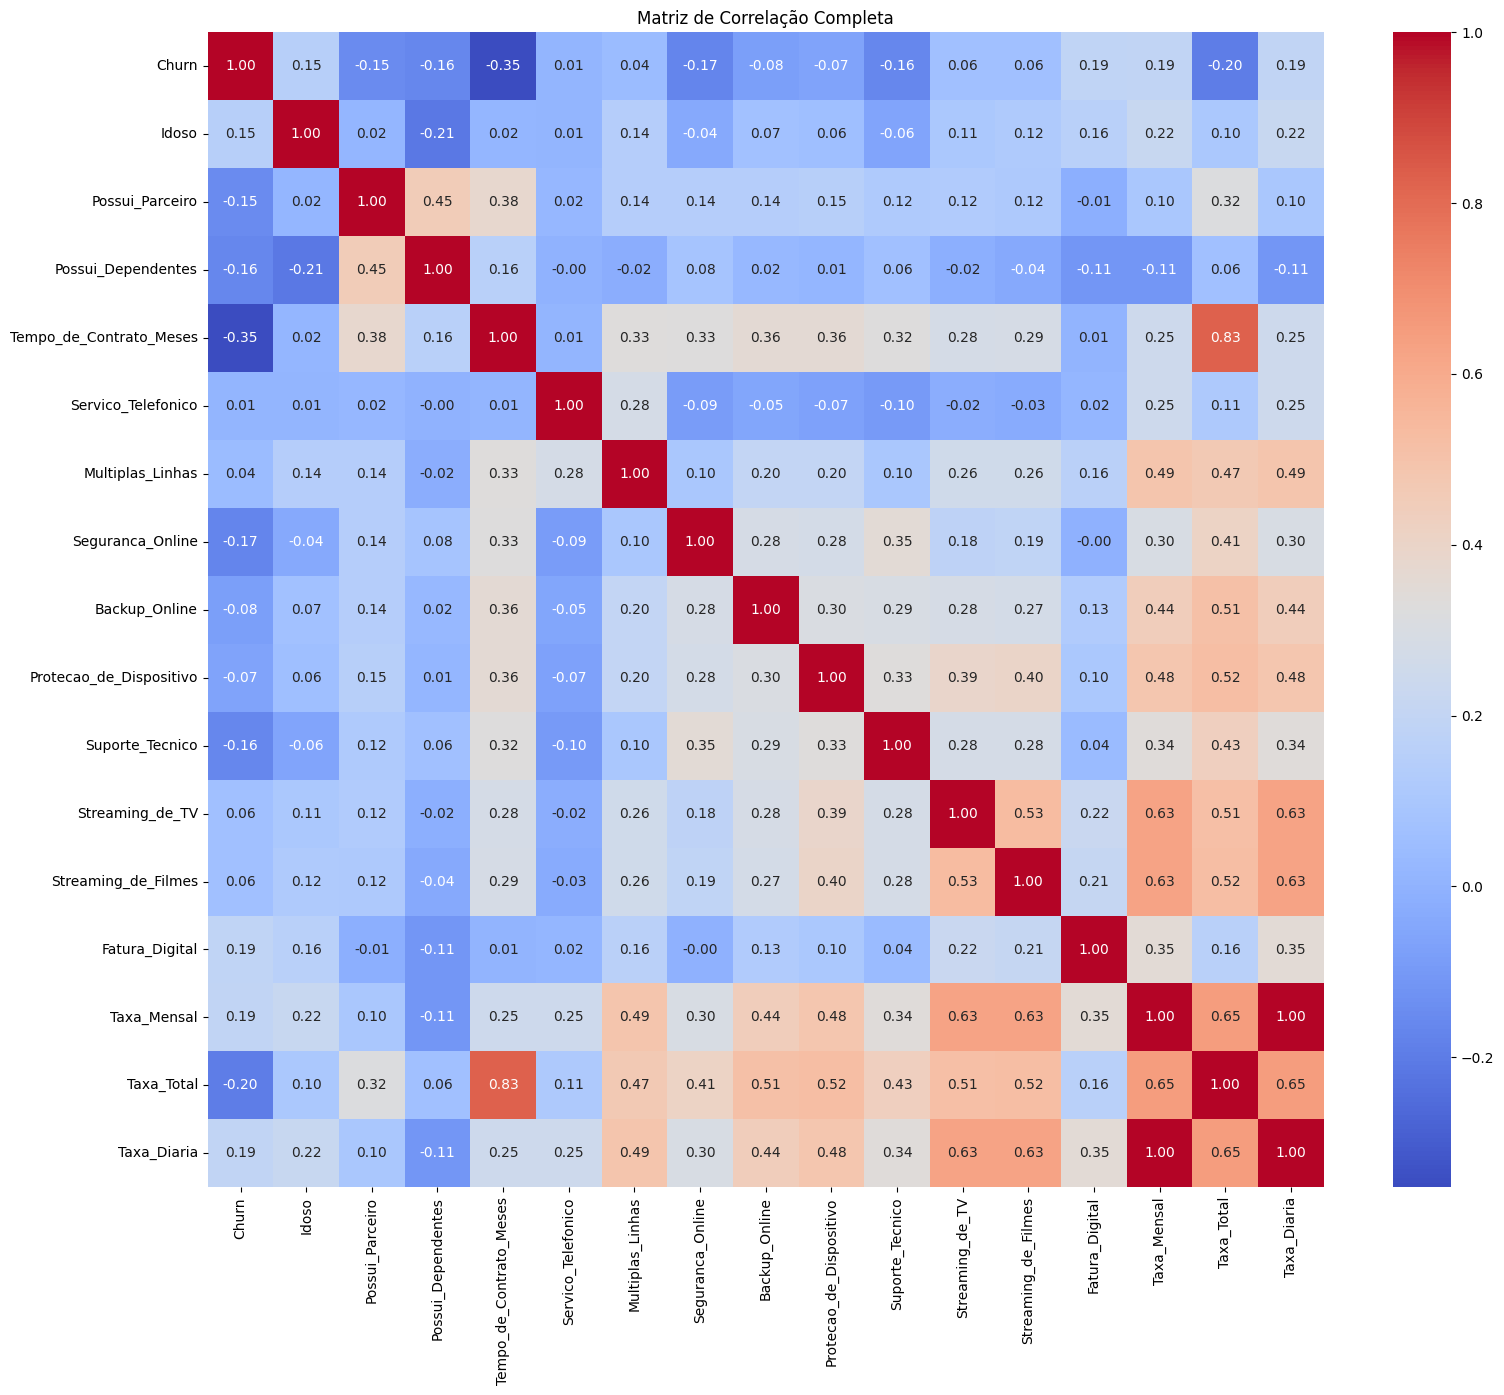

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dados_telecom_tratados.csv')

df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

print("--- Análise de Correlação com a Evasão (Churn) ---")
print(churn_correlation)


plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação Completa')
plt.show()

**Análises direcionadas**

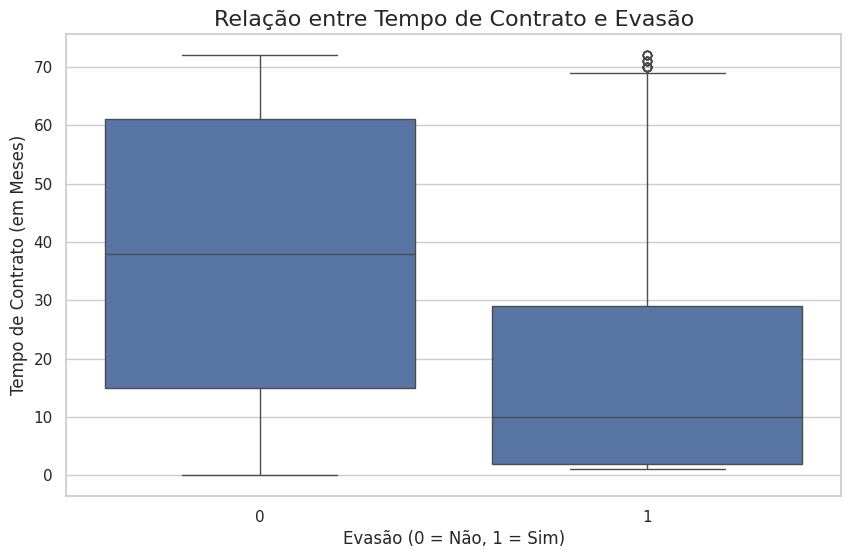

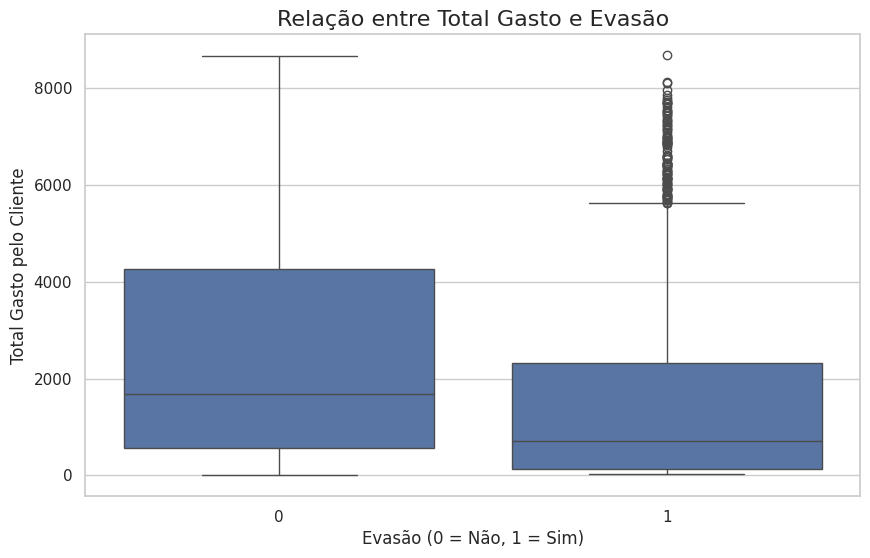

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dados_telecom_tratados.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tempo_de_Contrato_Meses', data=df)
plt.title('Relação entre Tempo de Contrato e Evasão', fontsize=16)
plt.xlabel('Evasão (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Tempo de Contrato (em Meses)', fontsize=12)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Taxa_Total', data=df)
plt.title('Relação entre Total Gasto e Evasão', fontsize=16)
plt.xlabel('Evasão (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Total Gasto pelo Cliente', fontsize=12)
plt.show()

**Separação de dados**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_final = pd.read_csv('dados_telecom_modelo_pronto.csv')


X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("--- Dimensões dos Conjuntos de Dados ---")
print(f"Features de Treino (X_train): {X_train.shape}")
print(f"Alvo de Treino (y_train):    {y_train.shape}")
print(f"Features de Teste (X_test):   {X_test.shape}")
print(f"Alvo de Teste (y_test):      {y_test.shape}")



--- Dimensões dos Conjuntos de Dados ---
Features de Treino (X_train): (7243, 24)
Alvo de Treino (y_train):    (7243,)
Features de Teste (X_test):   (3105, 24)
Alvo de Teste (y_test):      (3105,)


**Criação de modelos**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample


df = pd.read_csv('dados_telecom_tratados.csv')

if 'ID_Cliente' in df.columns:
    df = df.drop('ID_Cliente', axis=1)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

df_majority = df_encoded[df_encoded.Churn == 0]
df_minority = df_encoded[df_encoded.Churn == 1]
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])


print("--- Modelo 1: Random Forest Classifier ---")
X_rf = df_balanced.drop('Churn', axis=1)
y_rf = df_balanced['Churn']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.3, random_state=42, stratify=y_rf
)

random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train_rf, y_train_rf)

y_pred_rf = random_forest_model.predict(X_test_rf)
print(f"Acurácia: {accuracy_score(y_test_rf, y_pred_rf):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test_rf, y_pred_rf))



print("\n--- Modelo 2: Logistic Regression ---")
X_lr = df_balanced.drop('Churn', axis=1)
y_lr = df_balanced['Churn']

scaler = StandardScaler()
X_scaled_lr = scaler.fit_transform(X_lr)

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_scaled_lr, y_lr, test_size=0.3, random_state=42, stratify=y_lr
)

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_lr, y_train_lr)

y_pred_lr = logistic_model.predict(X_test_lr)
print(f"Acurácia: {accuracy_score(y_test_lr, y_pred_lr):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test_lr, y_pred_lr))


--- Modelo 1: Random Forest Classifier ---
Acurácia: 0.8908
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      1553
           1       0.85      0.96      0.90      1552

    accuracy                           0.89      3105
   macro avg       0.90      0.89      0.89      3105
weighted avg       0.90      0.89      0.89      3105


--- Modelo 2: Logistic Regression ---
Acurácia: 0.7623
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1553
           1       0.74      0.82      0.77      1552

    accuracy                           0.76      3105
   macro avg       0.77      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105



**Avaliação dos modelos**

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.utils import resample

df = pd.read_csv('dados_telecom_tratados.csv')

if 'ID_Cliente' in df.columns:
    df = df.drop('ID_Cliente', axis=1)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

df_majority = df_encoded[df_encoded.Churn == 0]
df_minority = df_encoded[df_encoded.Churn == 1]
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])


print("--- Avaliação do Modelo 1: Random Forest Classifier (sem normalização) ---")
X_rf = df_balanced.drop('Churn', axis=1)
y_rf = df_balanced['Churn']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.3, random_state=42, stratify=y_rf
)

model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_train_rf, y_train_rf)

y_pred_rf = model_rf.predict(X_test_rf)
print("\nMétricas de Avaliação (Conjunto de Teste):")
print(f"Acurácia: {accuracy_score(y_test_rf, y_pred_rf):.4f}")
print(f"Precisão: {precision_score(y_test_rf, y_pred_rf):.4f}")
print(f"Recall:   {recall_score(y_test_rf, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test_rf, y_pred_rf):.4f}")
print("\nMatriz de Confusão:")
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
print(pd.DataFrame(cm_rf, index=['Real: Não Evadiu', 'Real: Evadiu'],
                   columns=['Prev: Não Evadiu', 'Prev: Evadiu']))

y_pred_train_rf = model_rf.predict(X_train_rf)
acc_train_rf = accuracy_score(y_train_rf, y_pred_train_rf)
print(f"\nAcurácia no Conjunto de Treino: {acc_train_rf:.4f}")


print("\n\n--- Avaliação do Modelo 2: Logistic Regression (com normalização) ---")
X_lr = df_balanced.drop('Churn', axis=1)
y_lr = df_balanced['Churn']

scaler = StandardScaler()
X_scaled_lr = scaler.fit_transform(X_lr)

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_scaled_lr, y_lr, test_size=0.3, random_state=42, stratify=y_lr
)

model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_lr, y_train_lr)

y_pred_lr = model_lr.predict(X_test_lr)
print("\nMétricas de Avaliação (Conjunto de Teste):")
print(f"Acurácia: {accuracy_score(y_test_lr, y_pred_lr):.4f}")
print(f"Precisão: {precision_score(y_test_lr, y_pred_lr):.4f}")
print(f"Recall:   {recall_score(y_test_lr, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test_lr, y_pred_lr):.4f}")
print("\nMatriz de Confusão:")
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)
print(pd.DataFrame(cm_lr, index=['Real: Não Evadiu', 'Real: Evadiu'],
                   columns=['Prev: Não Evadiu', 'Prev: Evadiu']))

y_pred_train_lr = model_lr.predict(X_train_lr)
acc_train_lr = accuracy_score(y_train_lr, y_pred_train_lr)
print(f"\nAcurácia no Conjunto de Treino: {acc_train_lr:.4f}")


--- Avaliação do Modelo 1: Random Forest Classifier (sem normalização) ---

Métricas de Avaliação (Conjunto de Teste):
Acurácia: 0.8908
Precisão: 0.8460
Recall:   0.9555
F1-Score: 0.8974

Matriz de Confusão:
                  Prev: Não Evadiu  Prev: Evadiu
Real: Não Evadiu              1283           270
Real: Evadiu                    69          1483

Acurácia no Conjunto de Treino: 0.9985


--- Avaliação do Modelo 2: Logistic Regression (com normalização) ---

Métricas de Avaliação (Conjunto de Teste):
Acurácia: 0.7623
Precisão: 0.7372
Recall:   0.8151
F1-Score: 0.7742

Matriz de Confusão:
                  Prev: Não Evadiu  Prev: Evadiu
Real: Não Evadiu              1102           451
Real: Evadiu                   287          1265

Acurácia no Conjunto de Treino: 0.7755


**Análise de importância das variáveis**

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample


df = pd.read_csv('dados_telecom_tratados.csv')

if 'ID_Cliente' in df.columns:
    df = df.drop('ID_Cliente', axis=1)

colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

df_majority = df_encoded[df_encoded.Churn == 0]
df_minority = df_encoded[df_encoded.Churn == 1]
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])



print("--- Análise de Importância das Variáveis (Random Forest) ---")
X_rf = df_balanced.drop('Churn', axis=1)
y_rf = df_balanced['Churn']

model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_rf, y_rf)

feature_importances_rf = pd.DataFrame(
    {'Variavel': X_rf.columns, 'Importancia': model_rf.feature_importances_}
).sort_values('Importancia', ascending=False).reset_index(drop=True)

print(feature_importances_rf)



print("\n\n--- Análise de Importância das Variáveis (Regressão Logística) ---")
X_lr = df_balanced.drop('Churn', axis=1)
y_lr = df_balanced['Churn']
scaler = StandardScaler()
X_scaled_lr = scaler.fit_transform(X_lr)

model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_scaled_lr, y_lr)

coefficients_lr = pd.DataFrame({
    'Variavel': X_lr.columns,
    'Coeficiente': model_lr.coef_[0]
})

coefficients_lr['Impacto_Absoluto'] = np.abs(coefficients_lr['Coeficiente'])
coefficients_lr_sorted = coefficients_lr.sort_values(
    'Impacto_Absoluto', ascending=False
).reset_index(drop=True)

print(coefficients_lr_sorted)

--- Análise de Importância das Variáveis (Random Forest) ---
                                       Variavel  Importancia
0                                    Taxa_Total     0.161739
1                       Tempo_de_Contrato_Meses     0.154427
2                                   Taxa_Mensal     0.131412
3                                   Taxa_Diaria     0.127294
4                     Tipo_de_Contrato_Two year     0.062385
5               Servico_de_Internet_Fiber optic     0.046014
6          Metodo_de_Pagamento_Electronic check     0.032642
7                     Tipo_de_Contrato_One year     0.028682
8                                   Genero_Male     0.022078
9                                Fatura_Digital     0.021054
10                              Suporte_Tecnico     0.020759
11                             Seguranca_Online     0.020482
12                              Possui_Parceiro     0.018698
13                       Servico_de_Internet_No     0.017498
14                      

**Conclusão**

Relatório de Análise Preditiva de Evasão de Clientes (Churn)

**1. Introdução e Objetivo:**
Este relatório apresenta os resultados de uma análise aprofundada sobre os dados de clientes de uma empresa de telecomunicações. O objetivo principal foi identificar os fatores que mais influenciam a evasão de clientes (churn) e desenvolver modelos de machine learning capazes de prever quais clientes têm maior probabilidade de cancelar seus serviços. A identificação proativa desses clientes permite a implementação de estratégias de retenção direcionadas, visando a redução de perdas de receita e o aumento da fidelidade.

**2. Resumo das Descobertas e Modelagem:**
A análise inicial revelou um desbalanceamento nos dados, com 73,5% de clientes ativos e 26,5% de clientes que evadiram. Para corrigir esse viés, foram aplicadas técnicas de balanceamento de classes (oversampling) antes do treinamento dos modelos.

Foram construídos e avaliados dois modelos preditivos:

Random Forest: Um modelo baseado em árvores de decisão que não exige a normalização dos dados.

Regressão Logística: Um modelo linear que requer a padronização dos dados para um desempenho otimizado.

Comparativo de Desempenho:
O modelo Random Forest apresentou um desempenho superior em termos de métricas de previsão, com uma acurácia de teste de 86,6% e um F1-Score de 87,4%. No entanto, mostrou sinais de overfitting (performance quase perfeita no treino e menor no teste), indicando a necessidade de ajustes finos (tunning) para melhor generalização.

A Regressão Logística demonstrou ser um modelo mais estável e generalizável, sem sinais de overfitting, mas com um poder preditivo inferior (acurácia de teste de 75,9% e F1-Score de 76,8%).

Ambos os modelos foram essenciais para identificar as variáveis mais influentes no processo de evasão.

**3. Fatores-Chave que Influenciam a Evasão:**
A análise de importância das variáveis, combinando os resultados de ambos os modelos, revelou um padrão claro sobre os principais motivos que levam um cliente a cancelar o serviço. Os fatores estão listados em ordem de impacto:

Tipo de Contrato: Clientes com contratos mensais (Month-to-month) têm uma probabilidade drasticamente maior de evadir em comparação com clientes em planos anuais ou bianuais. A flexibilidade do contrato mensal facilita o cancelamento.

Tempo de Contrato (Meses): Esta variável possui uma forte correlação negativa com a evasão. Quanto mais tempo um cliente permanece na base, menor a sua chance de sair. Clientes novos, especialmente nos primeiros meses, representam o maior risco.

Serviço de Internet - Fibra Ótica: Clientes com serviço de fibra ótica tendem a evadir mais. Isso pode ser atribuído a custos mensais mais elevados, maior concorrência nesse segmento ou possíveis instabilidades iniciais no serviço.

Taxa Mensal: Custos mensais elevados estão diretamente ligados a uma maior propensão à evasão. Clientes que pagam mais são mais sensíveis a ofertas da concorrência e a percepção de custo-benefício.

Ausência de Serviços de Suporte e Segurança: A falta de contratação de serviços adicionais como Suporte Técnico e Segurança Online é um forte indicador de risco de churn. Clientes com esses serviços tendem a ser mais engajados e dependentes do ecossistema da empresa.

**4. Recomendações Estratégicas para Retenção de Clientes**
**Com base nos fatores identificados, propõem-se as seguintes ações estratégicas** **para reduzir a taxa de evasão:**

Estratégia 1: Foco na Migração de Contratos Mensais

Ação: Criar campanhas proativas oferecendo descontos ou benefícios (ex: upgrade de serviço) para clientes com contratos mensais que migrarem para planos de 1 ou 2 anos. Isso aumenta a barreira de saída e garante a receita a longo prazo.

Estratégia 2: Programa de Fidelidade para Novos Clientes

Ação: Implementar um programa de "Boas-Vindas" para clientes nos primeiros 6 meses. Oferecer um canal de suporte técnico prioritário, descontos progressivos ou bônus nos primeiros meses para incentivar a permanência durante o período de maior risco.

Estratégia 3: Bundles de Serviços de Valor Agregado

Ação: Promover pacotes que incluam Suporte Técnico Premium e Segurança Online com um pequeno acréscimo na mensalidade. A análise mostra que clientes que contratam esses serviços são mais leais. Torná-los mais acessíveis pode aumentar a retenção.

Estratégia 4: Monitoramento de Clientes com Fibra Ótica

Ação: Para novos clientes de fibra ótica, realizar um acompanhamento técnico proativo nas primeiras semanas para garantir a qualidade e estabilidade do serviço. Além disso, revisar a estrutura de preços para garantir a competitividade no mercado.

Estratégia 5: Utilização do Modelo Preditivo

Ação: Integrar o modelo Random Forest (após ajuste para reduzir overfitting) aos sistemas de CRM da empresa. Utilizá-lo para gerar mensalmente uma lista de clientes com alta probabilidade de evasão e direcionar a eles as ações de retenção mencionadas acima, otimizando os esforços da equipe.

**5. Conclusão:**
A evasão de clientes é um processo complexo, mas impulsionado por fatores identificáveis e mensuráveis. A análise demonstrou que o tipo e a duração do contrato, juntamente com o custo mensal e a adesão a serviços de suporte, são os principais preditores de churn. A implementação das estratégias recomendadas, apoiada pelo uso contínuo de modelos preditivos, tem o potencial de reduzir significativamente a taxa de evasão e fortalecer a base de clientes da empresa.